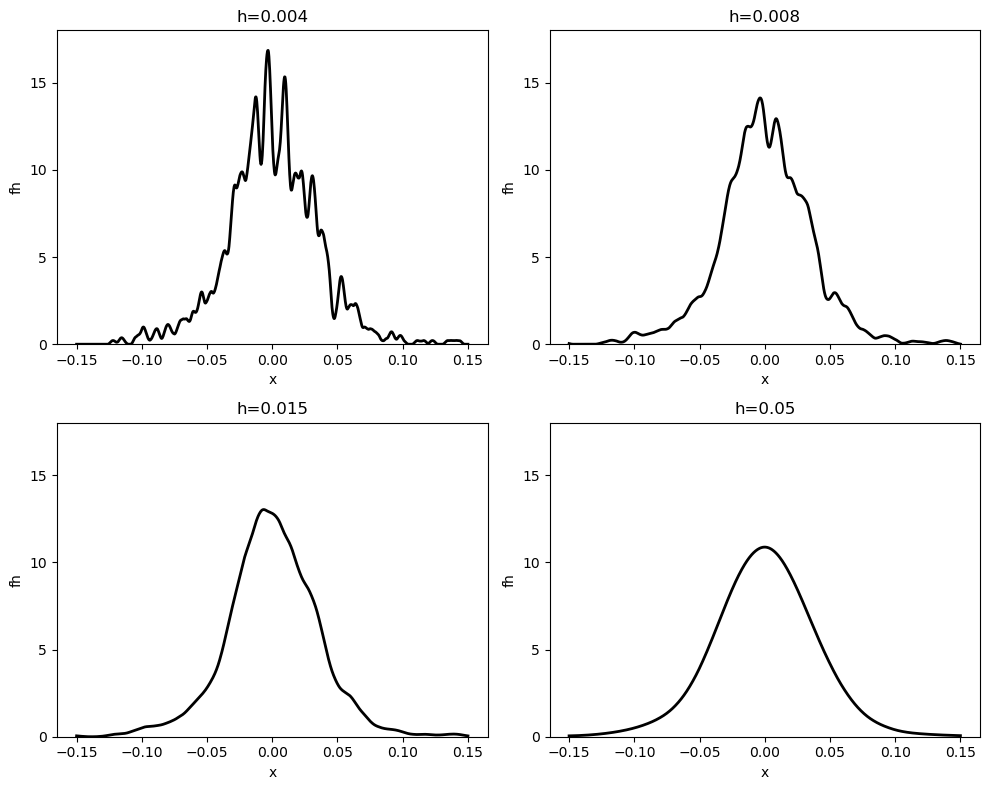

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from stockres.dat
data = np.loadtxt('stockres.dat')

# Define the bandwidths
bandwidths = [0.004, 0.008, 0.015, 0.050]

# Quartic (biweight) kernel function
def quartic_kernel(u):
    return 15/16 * (1 - u**2)**2 * (np.abs(u) <= 1)

# Kernel density estimation using the Quartic kernel
def kde_quartic(x, data, bandwidth):
    n = len(data)
    return np.sum(quartic_kernel((x - data[:, None]) / bandwidth), axis=0) / (n * bandwidth)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Generate x values for plotting
x_plot = np.linspace(-0.15, 0.15, 1000)

# Plot each subplot with a different bandwidth
for ax, h in zip(axs.flat, bandwidths):
    y = kde_quartic(x_plot, data, h)
    ax.plot(x_plot, y, 'k-', linewidth=2)
    ax.set_title(f'h={h}')
    ax.set_xlabel('x')
    ax.set_ylabel('fh')
    ax.set_yticks([0, 5, 10, 15])
    ax.set_ylim(0, 18)  # Set the y-axis limits to be the same for all subplots

fig.patch.set_alpha(0)
    
plt.tight_layout()
plt.show()
